### Analysis of OpenTable data
- Data Source: https://www.opentable.com/state-of-industry
- State Restaurant Openings: https://www.kiro7.com/news/trending/which-states-are-letting-restaurants-open-dine-in-service/PO7FBGR5ZRHHLFPUAWCVDJB3C4/

In [8]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

from state_config import state_conversion

sns.set()
rcParams['font.family'] = 'DejaVu Sans'
pd.options.display.max_columns = 500
pd.options.display.max_rows = 1000

In [2]:
data = pd.read_csv('../data/opentable.csv')

# Date columns: March 16 and on
dates = data.columns[64:]

print(data.shape)
data.head()

(105, 101)


Type       Name  2/18  2/19  2/20  2/21  2/22  2/23  2/24  2/25  2/26  \
0  country     Global    -1     3    -1    -2     1     4     1     1    -2   
1  country  Australia    -3    -6    -3    -1     0     0     0    -2    -2   
2  country     Canada    -5     0    -3    -2    -1     8    -2    -3     1   
3  country    Germany    11     4     3     5     1     2    11     4     5   
4  country    Ireland     2     0     4     1    -3     4    -9    -8   -10   

   2/27  2/28  2/29  3/1  3/2  3/3  3/4  3/5  3/6  3/7  3/8  3/9  3/10  3/11  \
0    -3    -1     1    0   -8   -9   -6   -7   -7   -4   -3  -14   -18   -19   
1    -7     0    -1    4  -12   -6  -12   -8   -6   -3   -4  -10    -4   -10   
2   -12    -8    -4   -7  -12   -7   -2   -4   -8   -9   -1  -13   -18   -19   
3     5    11     7    9   -8    0   -4   -6   -7    4   11  -10   -16   -11   
4    -2   -10   -13   10   -6   -7   -1  -15  -13   -5    4  -10   -28   -27   

   3/12  3/13  3/14  3/15  3/16  3/17  3/18   3/19   3/20   3/21   3/22  \
0   -28   -36   -40   -47   -56   -83   -89 -96.03 -97.94 -98.96 -99.24   
1   -12    -8   -11   -12   -30   -43   -50 -53.00 -51.67 -53.61 -65.53   
2   -28   -40   -41   -47   -60   -94   -97 -99.47 -99.72 -99.89 -99.94   
3   -17   -28   -38   -46   -63   -90   -95 -98.36 -98.79 -99.78 -99.96   
4   -46   -51   -52   -75   -70   -86   -97 -98.55 -99.08 -98.76 -98.31   

     3/23    3/24    3/25    3/26    3/27    3/28    3/29    3/30    3/31  \
0  -99.68  -99.72  -99.75  -99.79  -99.83  -99.85  -99.89  -99.83  -99.87   
1  -99.82 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00   
2  -99.97  -99.99  -99.97  -99.98  -99.98 -100.00 -100.00 -100.00 -100.00   
3 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00   
4 -100.00  -99.55 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00   

      4/1     4/2     4/3     4/4     4/5     4/6     4/7     4/8  4/9  \
0  -99.91  -99.92  -99.92  -99.94  -99.94  -99.93  -99.94  -99.94 -100   
1 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100   
2 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100   
3 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100   
4 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100   

     4/10    4/11    4/12    4/13    4/14    4/15    4/16    4/17    4/18  \
0  -99.94  -99.95  -99.95  -99.94  -99.94  -99.93  -99.93  -99.93  -99.93   
1 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00   
2 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00  -99.99  -99.99   
3  -99.86 -100.00 -100.00 -100.00  -99.94 -100.00 -100.00 -100.00 -100.00   
4 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00  -99.68 -100.00 -100.00   

     4/19    4/20    4/21    4/22    4/23    4/24    4/25    4/26    4/27  \
0  -99.94  -99.95  -99.93  -99.92  -99.94  -99.94  -99.92  -99.94  -99.85   
1 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00   
2 -100.00 -100.00 -100.00 -100.00 -100.00  -99.99  -99.99 -100.00 -100.00   
3 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00   
4 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00   

     4/28    4/29    4/30     5/1     5/2     5/3     5/4     5/5     5/6  \
0  -99.86  -99.84  -99.79  -99.00  -99.12  -99.26  -98.38  -98.26  -98.37   
1 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00   
2 -100.00 -100.00 -100.00  -99.99 -100.00 -100.00 -100.00 -100.00 -100.00   
3 -100.00 -100.00  -99.91 -100.00  -99.97 -100.00 -100.00 -100.00 -100.00   
4 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00 -100.00   

      5/7     5/8     5/9    5/10   5/11   5/12   5/13   5/14   5/15   5/16  \
0  -98.16  -97.62  -97.57  -97.22 -96.25 -96.26 -95.92 -95.53 -93.99 -93.34   
1 -100.00 -100.00 -100.00 -100.00 -98.51 -99.03 -98.57 -99.03 -97.01 -94.61   
2 -100.00 -100.00  -99.99 -100.00 -99.93 -99.94 -99.89 -99.20 -98

In [3]:
# States that have no restaurant data
no_restaurant_states = [
    'Alaska', 'Arkansas', 'Delaware', 'Idaho', 
    'Maine', 'Mississippi', 'Montana', 'North Dakota',
    'New Hampshire', 'South Dakota', 'Vermont', 'West Virginia',
    'Wyoming',
]
state_full_name = list(state_conversion.values())
state_full_name = [state for state in state_full_name if state not in no_restaurant_states]

In [4]:
# State Calendar Breakdowns
state_calendar = pd.read_csv('../data/restaurant_opens.csv')
state_calendar[state_calendar['State'].isin(state_full_name)]

State                                    Characteristics  \
0          Alabama        Tables 6 feet apart; eight people per table   
2          Arizona  Reduced occupancy suggested; tables 6 feet apa...   
4       California                    Limited to takeout and delivery   
5         Colorado  Limited to takeout and delivery now; upon reop...   
6      Connecticut             Tables 6 feet apart for outdoor dining   
8          Florida  Tables 6 feet apart; no more than 10 seated to...   
9          Georgia  Ten customers per 300 square feet; tables 6 fe...   
10          Hawaii                    Limited to takeout and delivery   
12        Illinois                    Limited to takeout and delivery   
13         Indiana  Tables 6 feet apart; six people per table; 50%...   
15          Kansas  Customers should be 6 feet apart; no groups la...   
16        Kentucky  Limited to takeout and delivery; 33% capacity ...   
17       Louisiana  Tables 6 feet apart; 25% of seating occupancy;...   
19        Maryland                    Limited to takeout and delivery   
20   Massachusetts                    Limited to takeout and delivery   
21        Michigan                    Limited to takeout and delivery   
22       Minnesota                    Limited to takeout and delivery   
24        Missouri  Tables at least 6 feet apart; 10 people per party   
26        Nebraska  Tables 6 feet apart; 50% seating occupancy; si...   
27          Nevada  Tables 6 feet apart; 50% occupancy; five custo...   
29      New Jersey                    Limited to takeout and delivery   
30      New Mexico                    Limited to takeout and delivery   
31        New York                    Limited to takeout and delivery   
32  North Carolina                    Limited to takeout and delivery   
34            Ohio     Ten customers per table; 6 feet between tables   
35        Oklahoma                                Tables 6 feet apart   
36          Oregon     Ten customers per table; 6 feet between tables   
37    Pennsylvania                    Limited to takeout and delivery   
38    Rhode Island  Tables 8 feet apart; five customers per party;...   
39  South Carolina  Tables 6-8 feet apart; 50% occupancy; eight cu...   
41       Tennessee  Tables 6 feet apart; 50% of occupancy; six cus...   
42           Texas                                Tables 6 feet apart   
43            Utah                              6 feet between tables   
45        Virginia                    Limited to takeout and delivery   
46      Washington                    Limited to takeout and delivery   
48       Wisconsin                    Limited to takeout and delivery   

         Date  
0        5/11  
2        5/11  
4   In effect  
5   In effect  
6        5/20  
8        4/30  
9        4/27  
10        4/1  
12       June  
13        5/4  
15        5/4  
16       5/22  
17       5/15  
19       5/15  
20       5/18  
21       5/15  
22       5/13  
24        5/3  
26        5/4  
27       4/30  
29        5/7  
30       5/31  
31       5/15  
32   May 8-22  
34       5/15  
35       5/16  
36    No date  
37        5/8  
38       5/18  
39       4/27  
41       4/30  
42        5/1  
43        5/1  
45       6/10  
46       5/31  
48       5/13

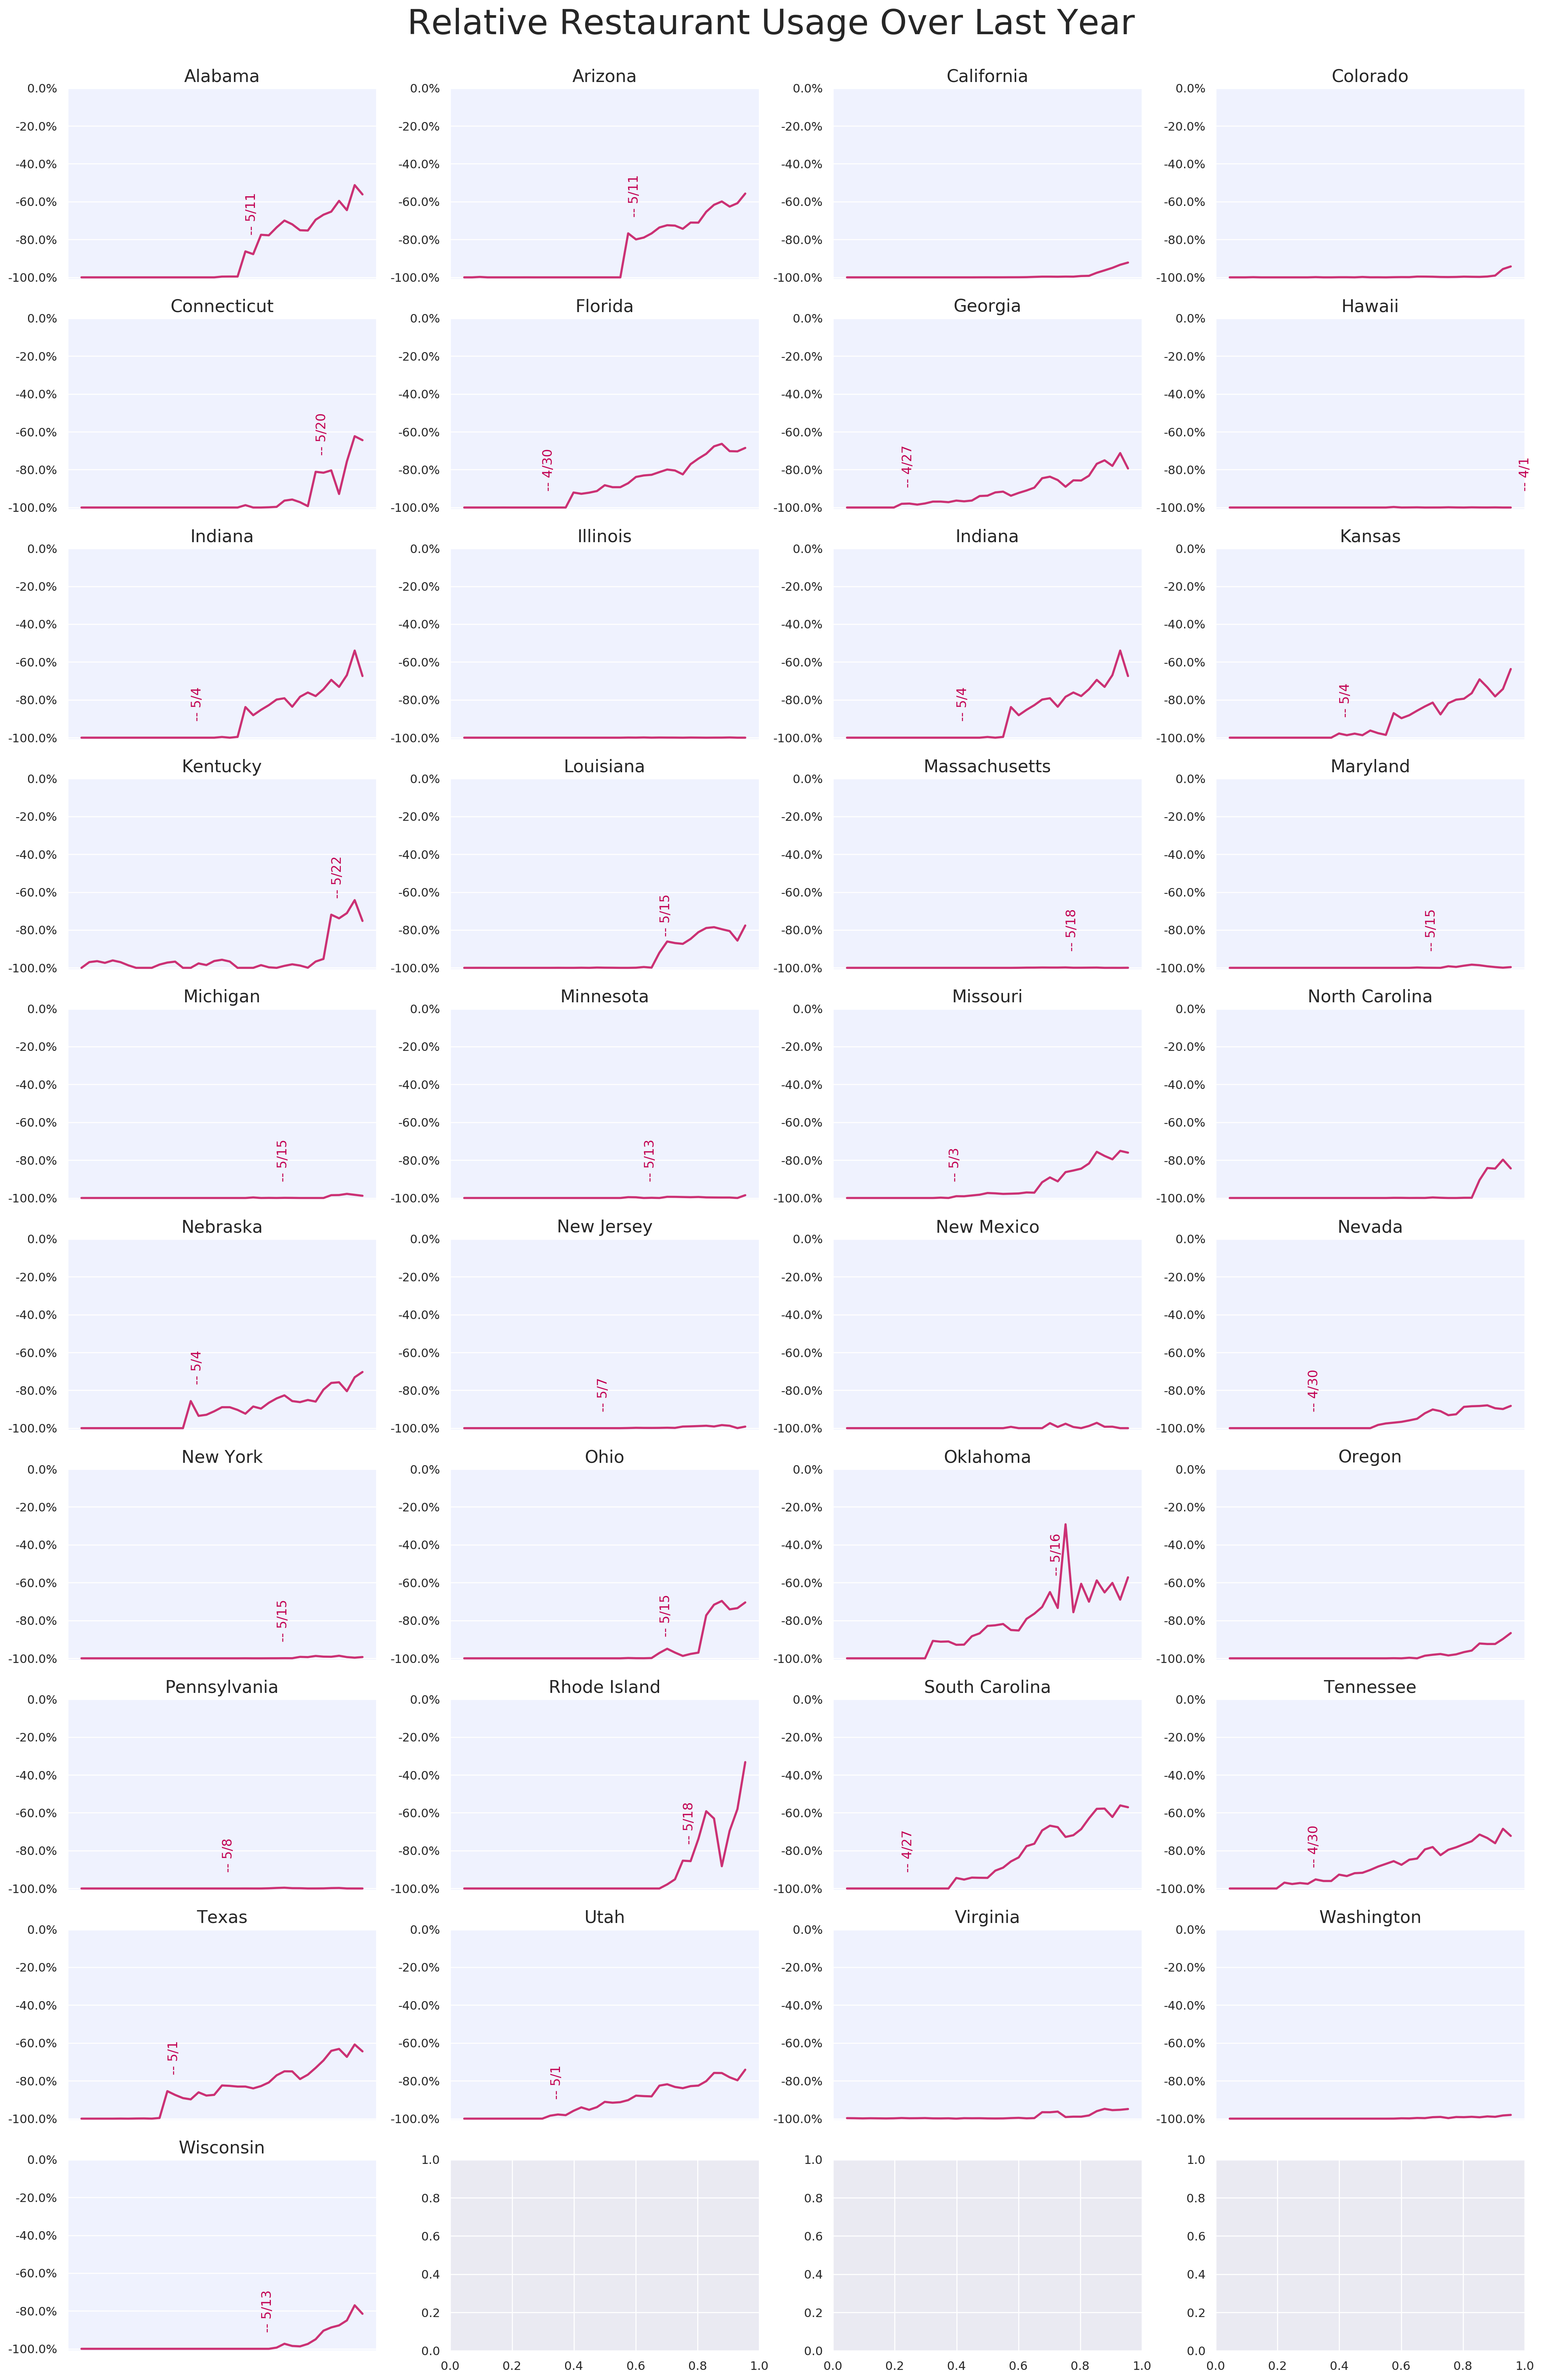

In [5]:
def counts_chart(df, states, dates):
    '''Plot distribution of case counts and the rolling average'''
    
    fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(20,30), dpi=200)
    fig.suptitle('Relative Restaurant Usage Over Last Year', fontsize=32, y=1.02)
    
    for index, ax in enumerate(axes.flatten()):
        
        # Skip these indices
        skippers = [37, 38, 39]
        if index in skippers:
            continue
        
        # Isolate state
        state = states[index]
        condition = (df['Name'] == state) & (df['Type'] == 'state')
        index_values = df.loc[condition, dates].values.flatten()
        
        # Plot parameters
        ax.set_facecolor('#EFF2FE')
        ax.set_title(state, fontsize=16)
        ax.tick_params(labelbottom=False)
        ax.xaxis.grid(False)
        ax.set_ylim(-101, 0)
        ax.set_yticklabels(['{}%'.format(ticks) for ticks in ax.get_yticks()])
        
        # Annotation
        open_date = state_calendar.loc[state_calendar['State'] == state, 'Date'].values[0]
        try:
            date_index_value = df.loc[condition, open_date].values[0]
            ax.text(open_date, date_index_value + 10, "-- {}".format(open_date), color='#C20051', rotation=90)
        except:
            pass
        
        # Plot: Distribution of counts per day
        ax.plot(dates, index_values, color='#C20051', alpha=0.8, linewidth=2.0)
            
    plt.tight_layout()
    plt.savefig('../images/restaraunt.png', bbox_inches='tight', dpi=200)
    plt.show()
        
counts_chart(data, state_full_name, dates)

### Regional Breakdown

In [6]:
opened_states = [
    'Alabama', 'Arizona', 'Connecticut', 'Florida', 'Georgia',
    'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Missouri',
    'Nebraska', 'Nevada', 'Ohio', 'Oklahoma', 'Rhode Island',
    'South Carolina', 'Tennessee', 'Texas', 'Utah'
]
the_south = [
    'Alabama', 'Florida', 'Georgia', 'Kentucky', 'Louisiana',
    'South Carolina', 'Tennessee'
]
the_southwest = ['Arizona', 'Nevada', 'Oklahoma', 'Texas', 'Utah']
the_midwest = ['Indiana', 'Kansas', 'Missouri', 'Nebraska', 'Ohio']
the_northeast = ['Connecticut', 'Rhode Island']

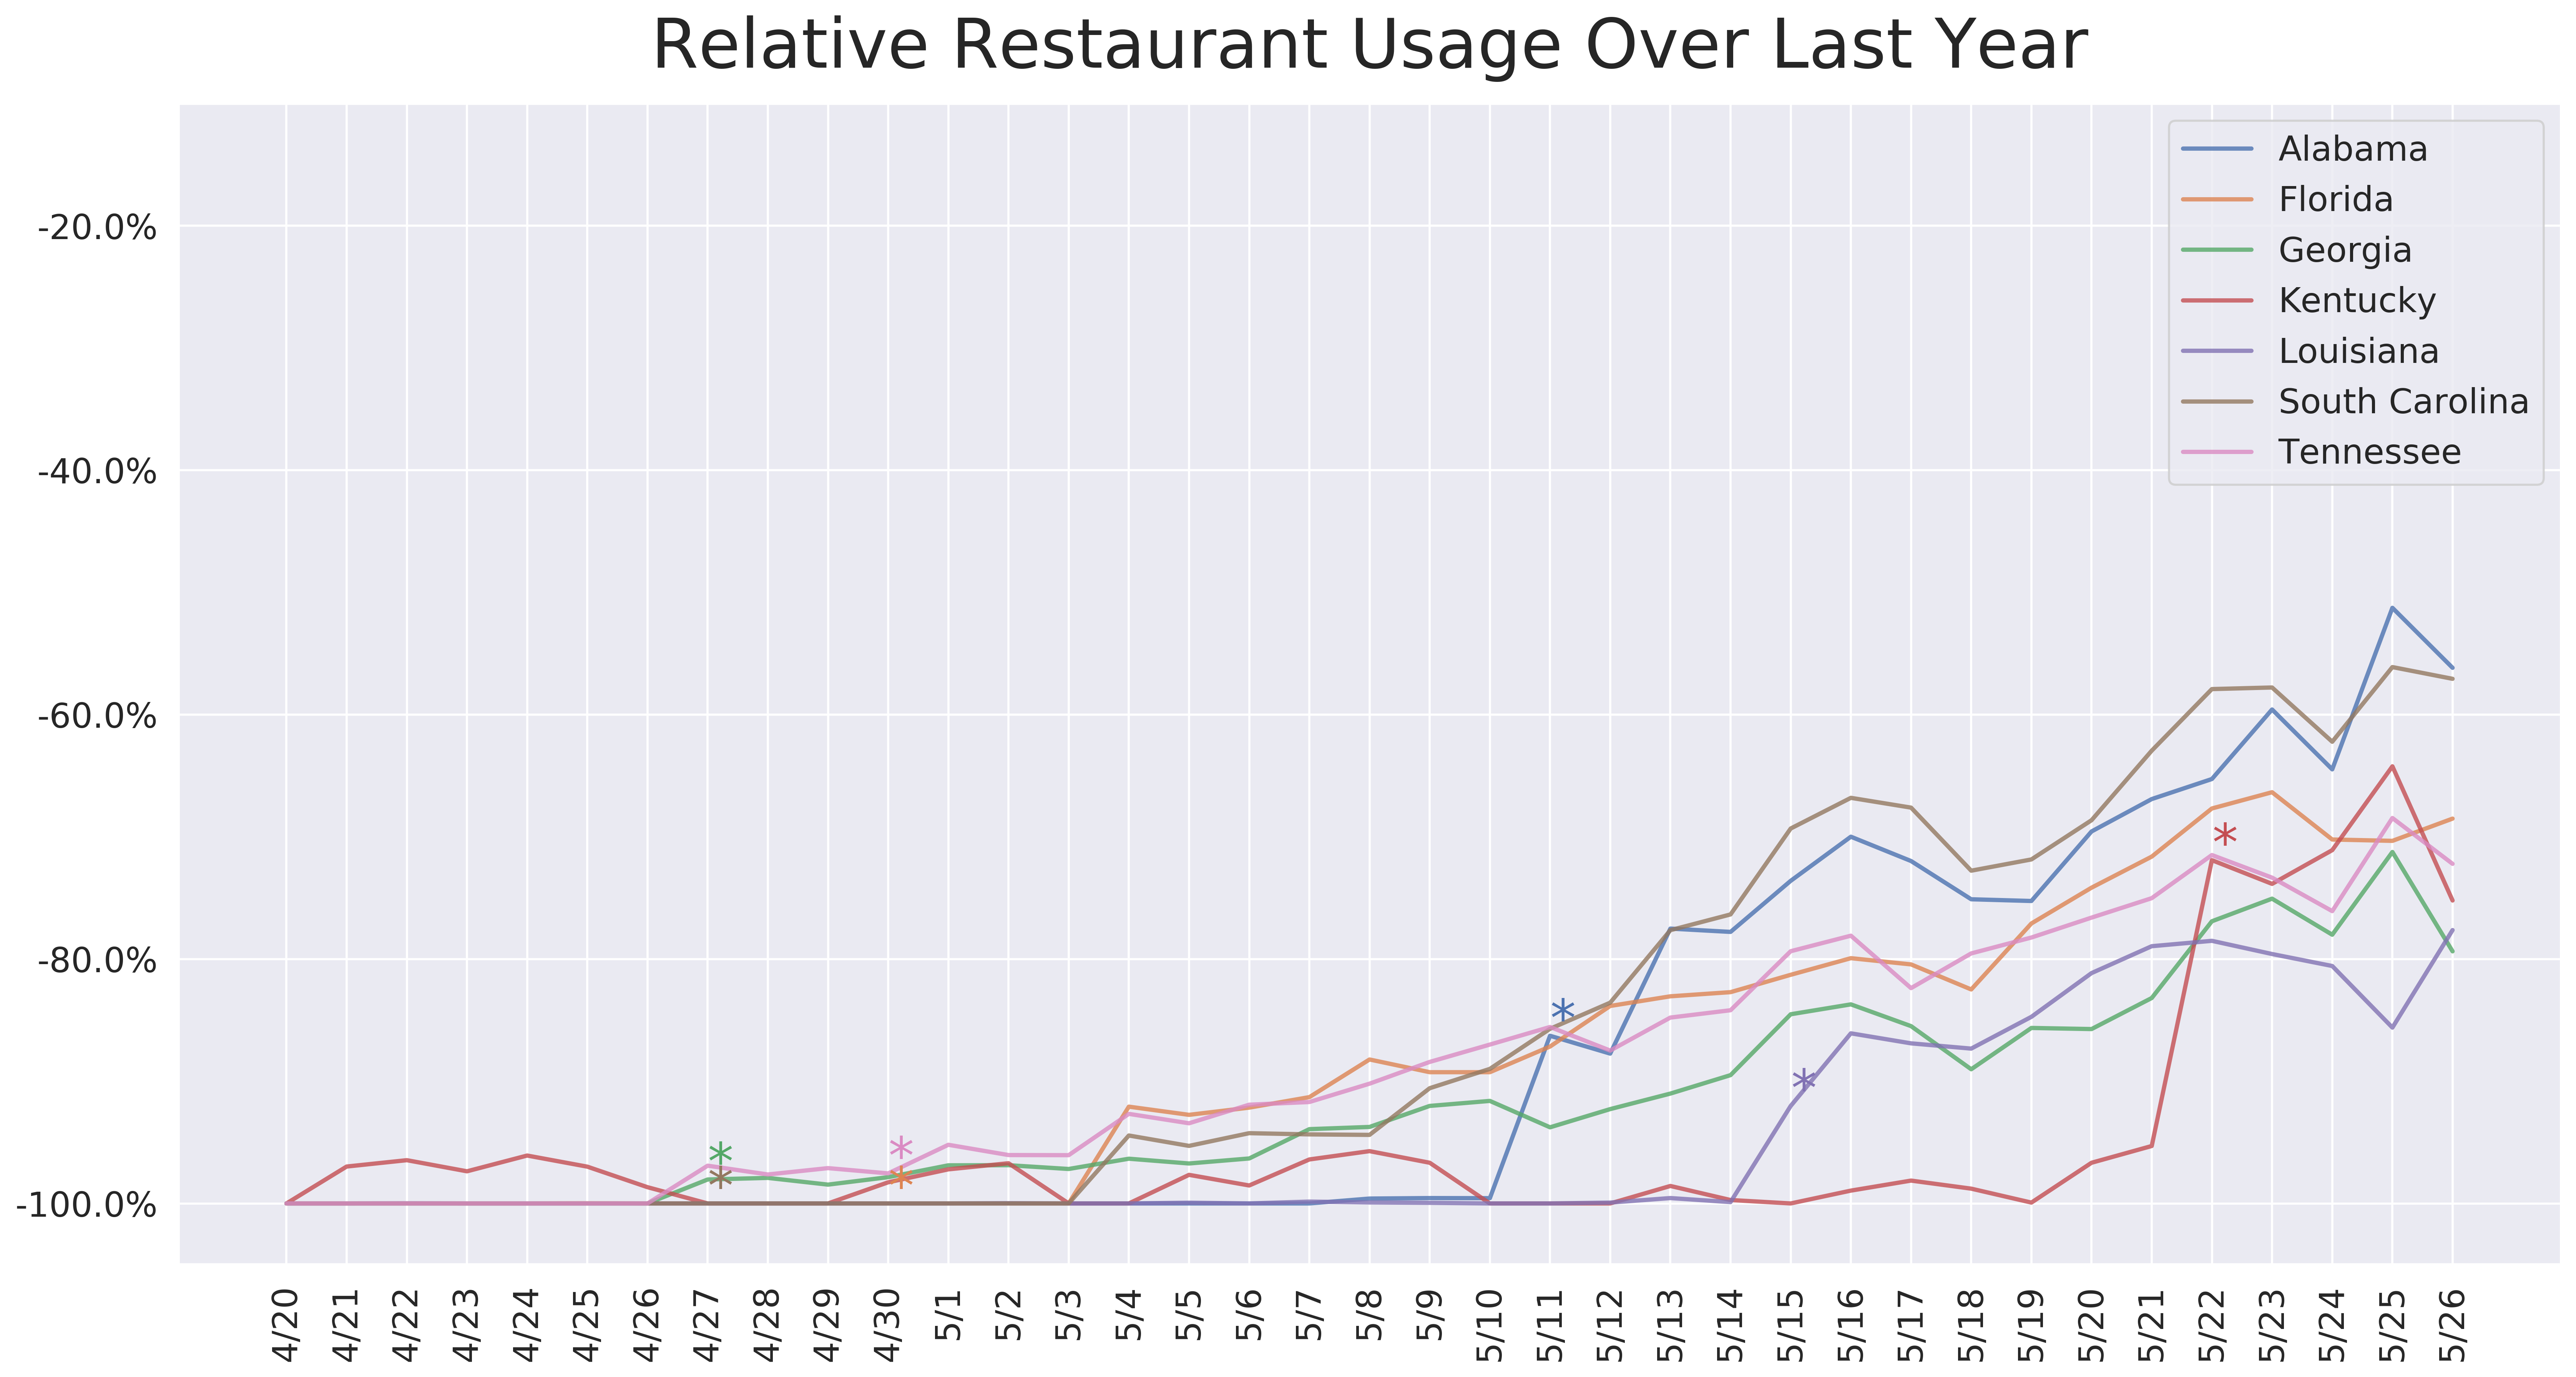

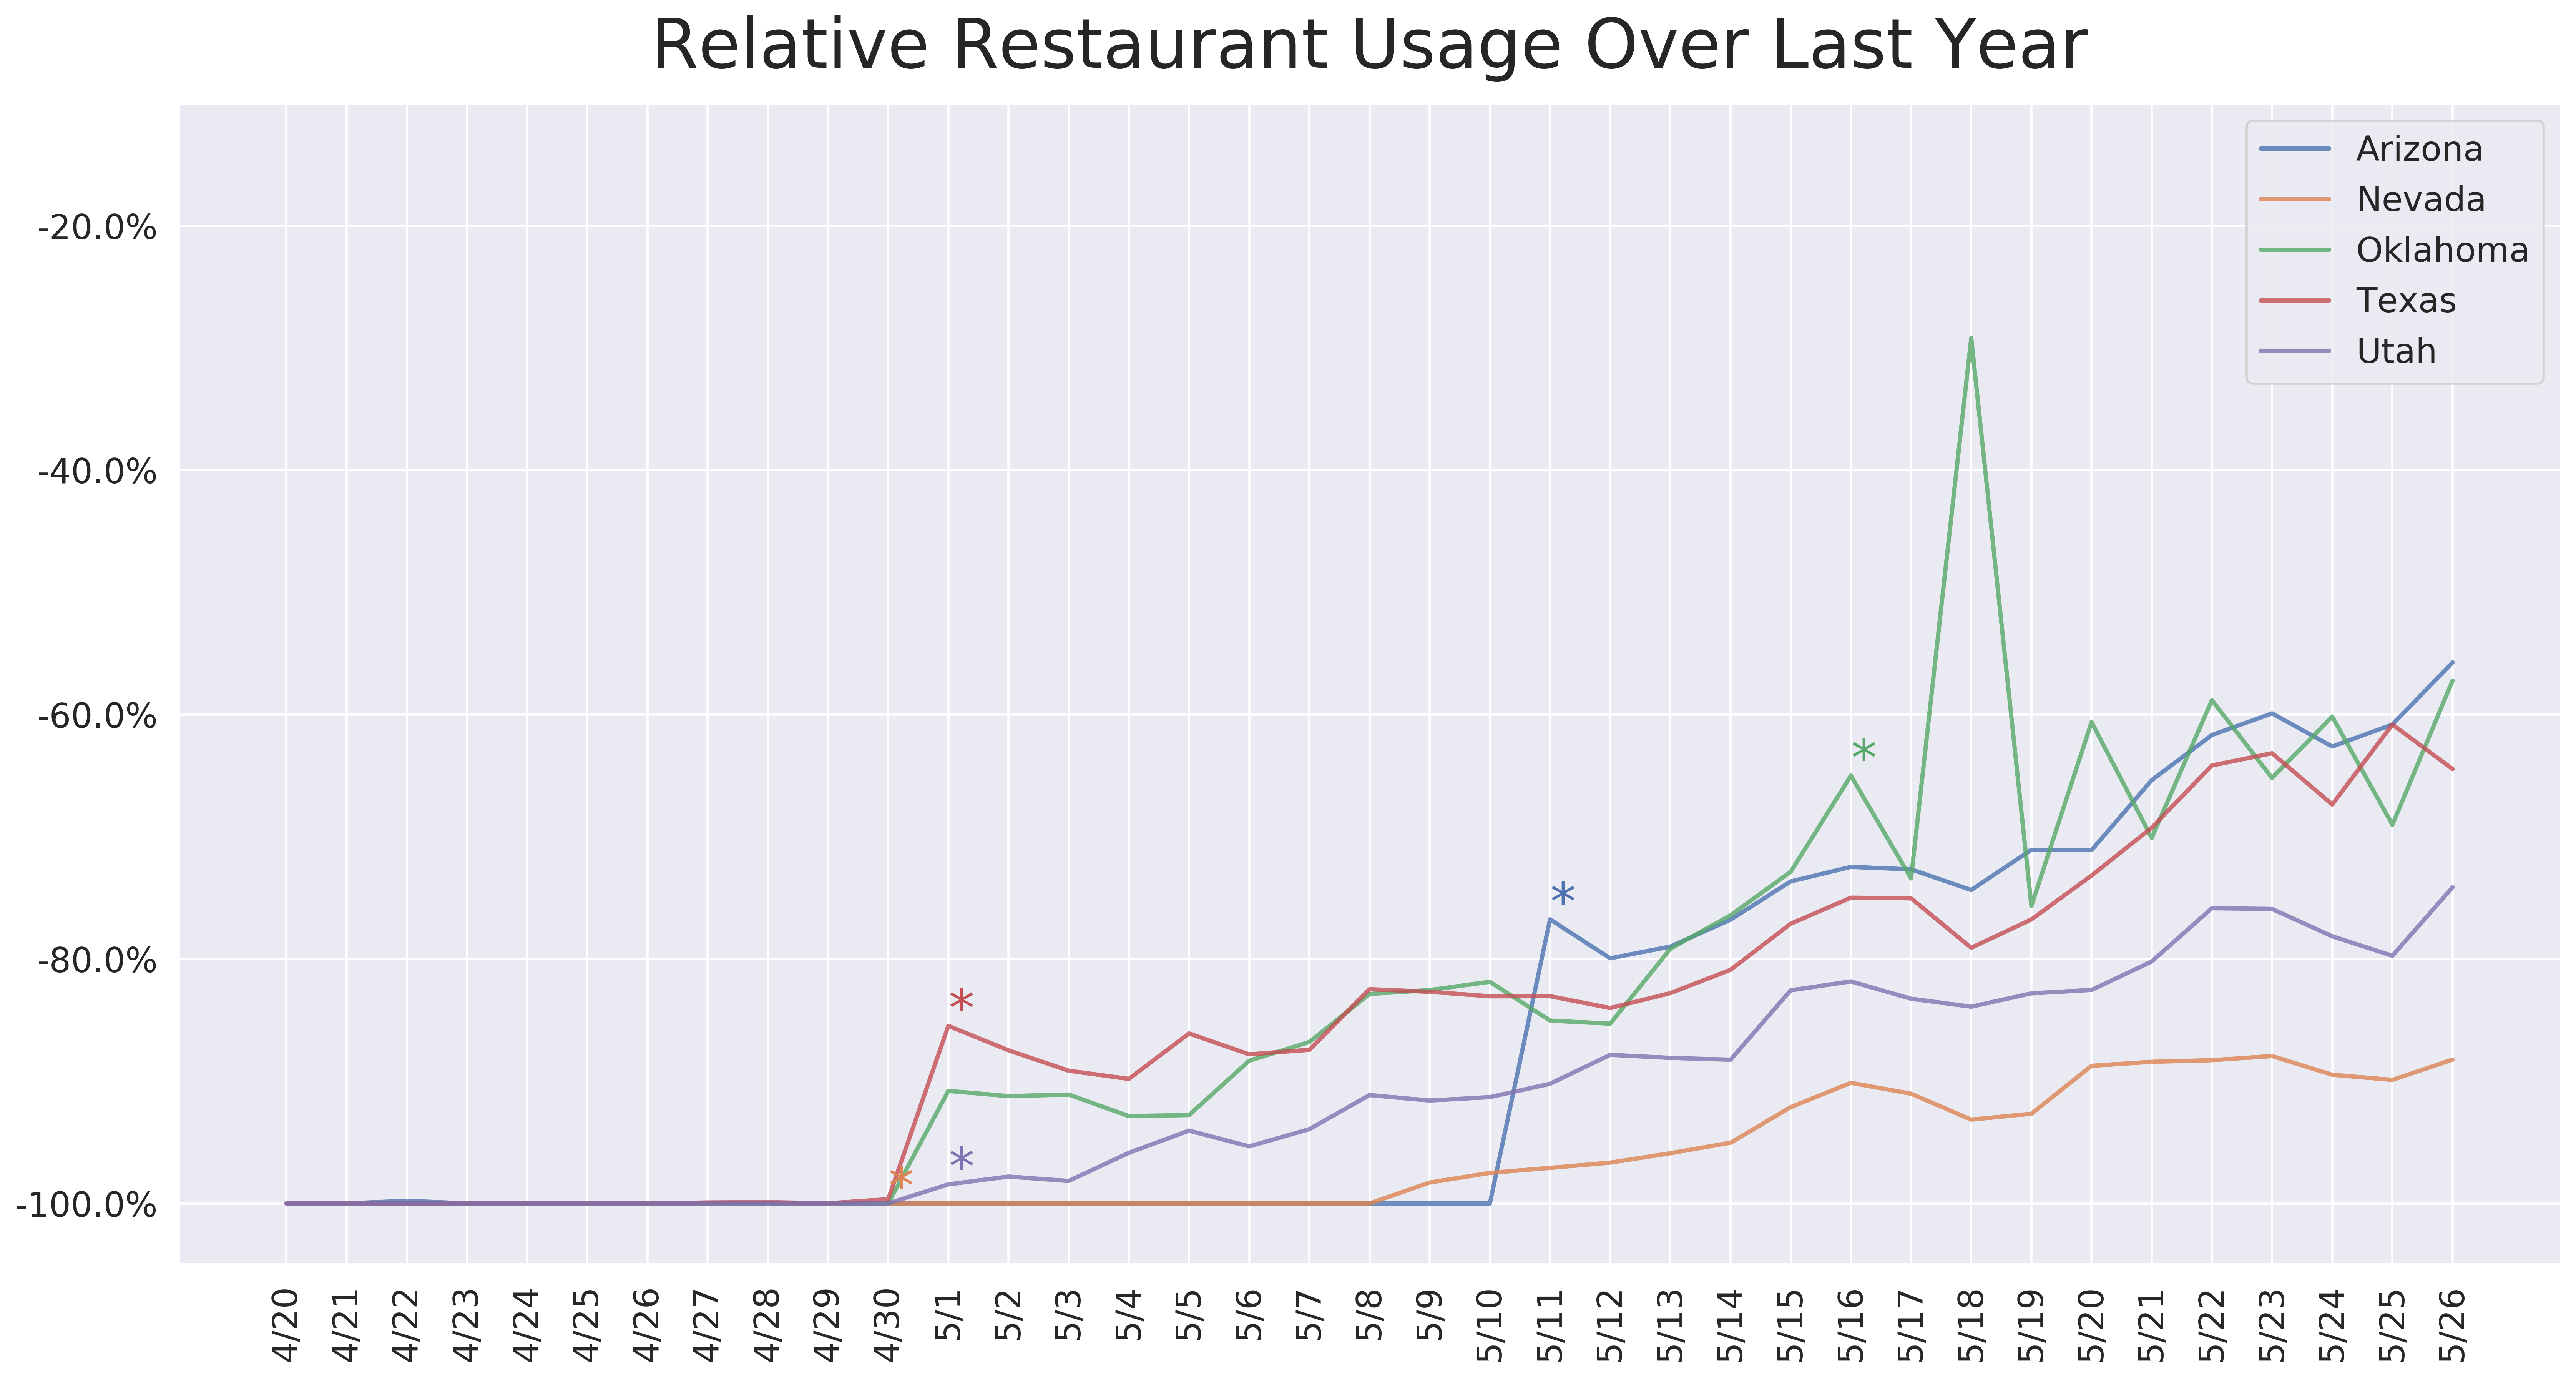

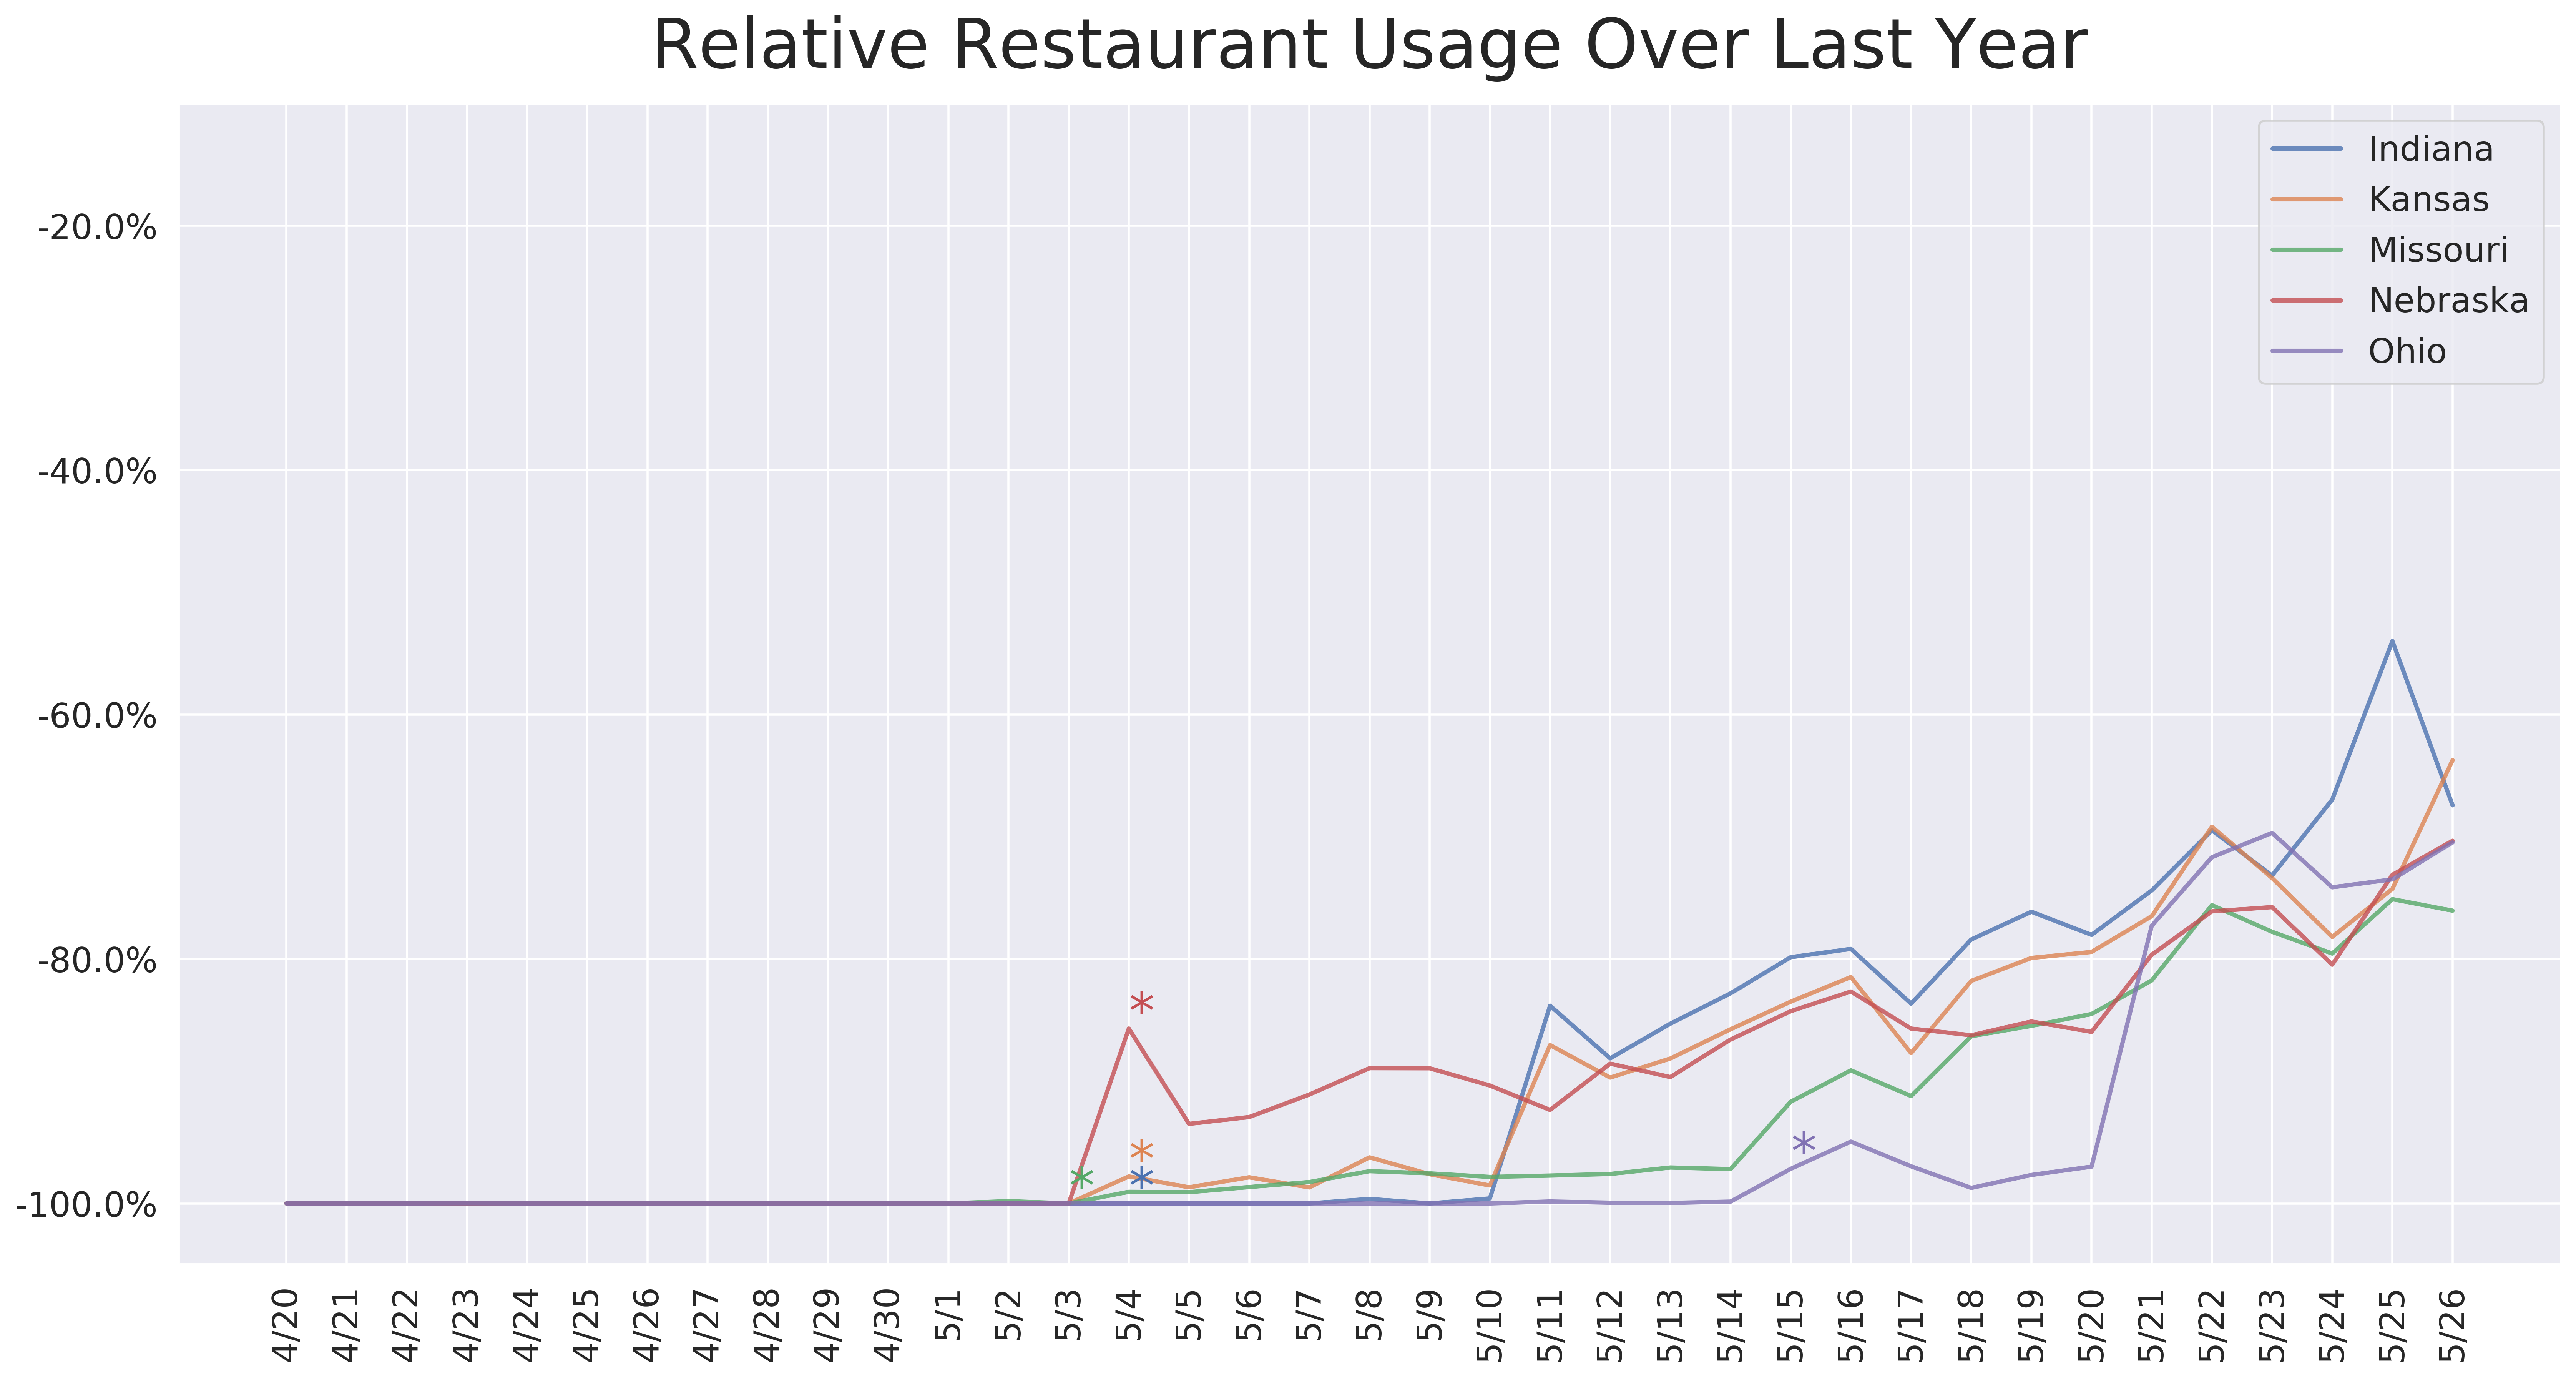

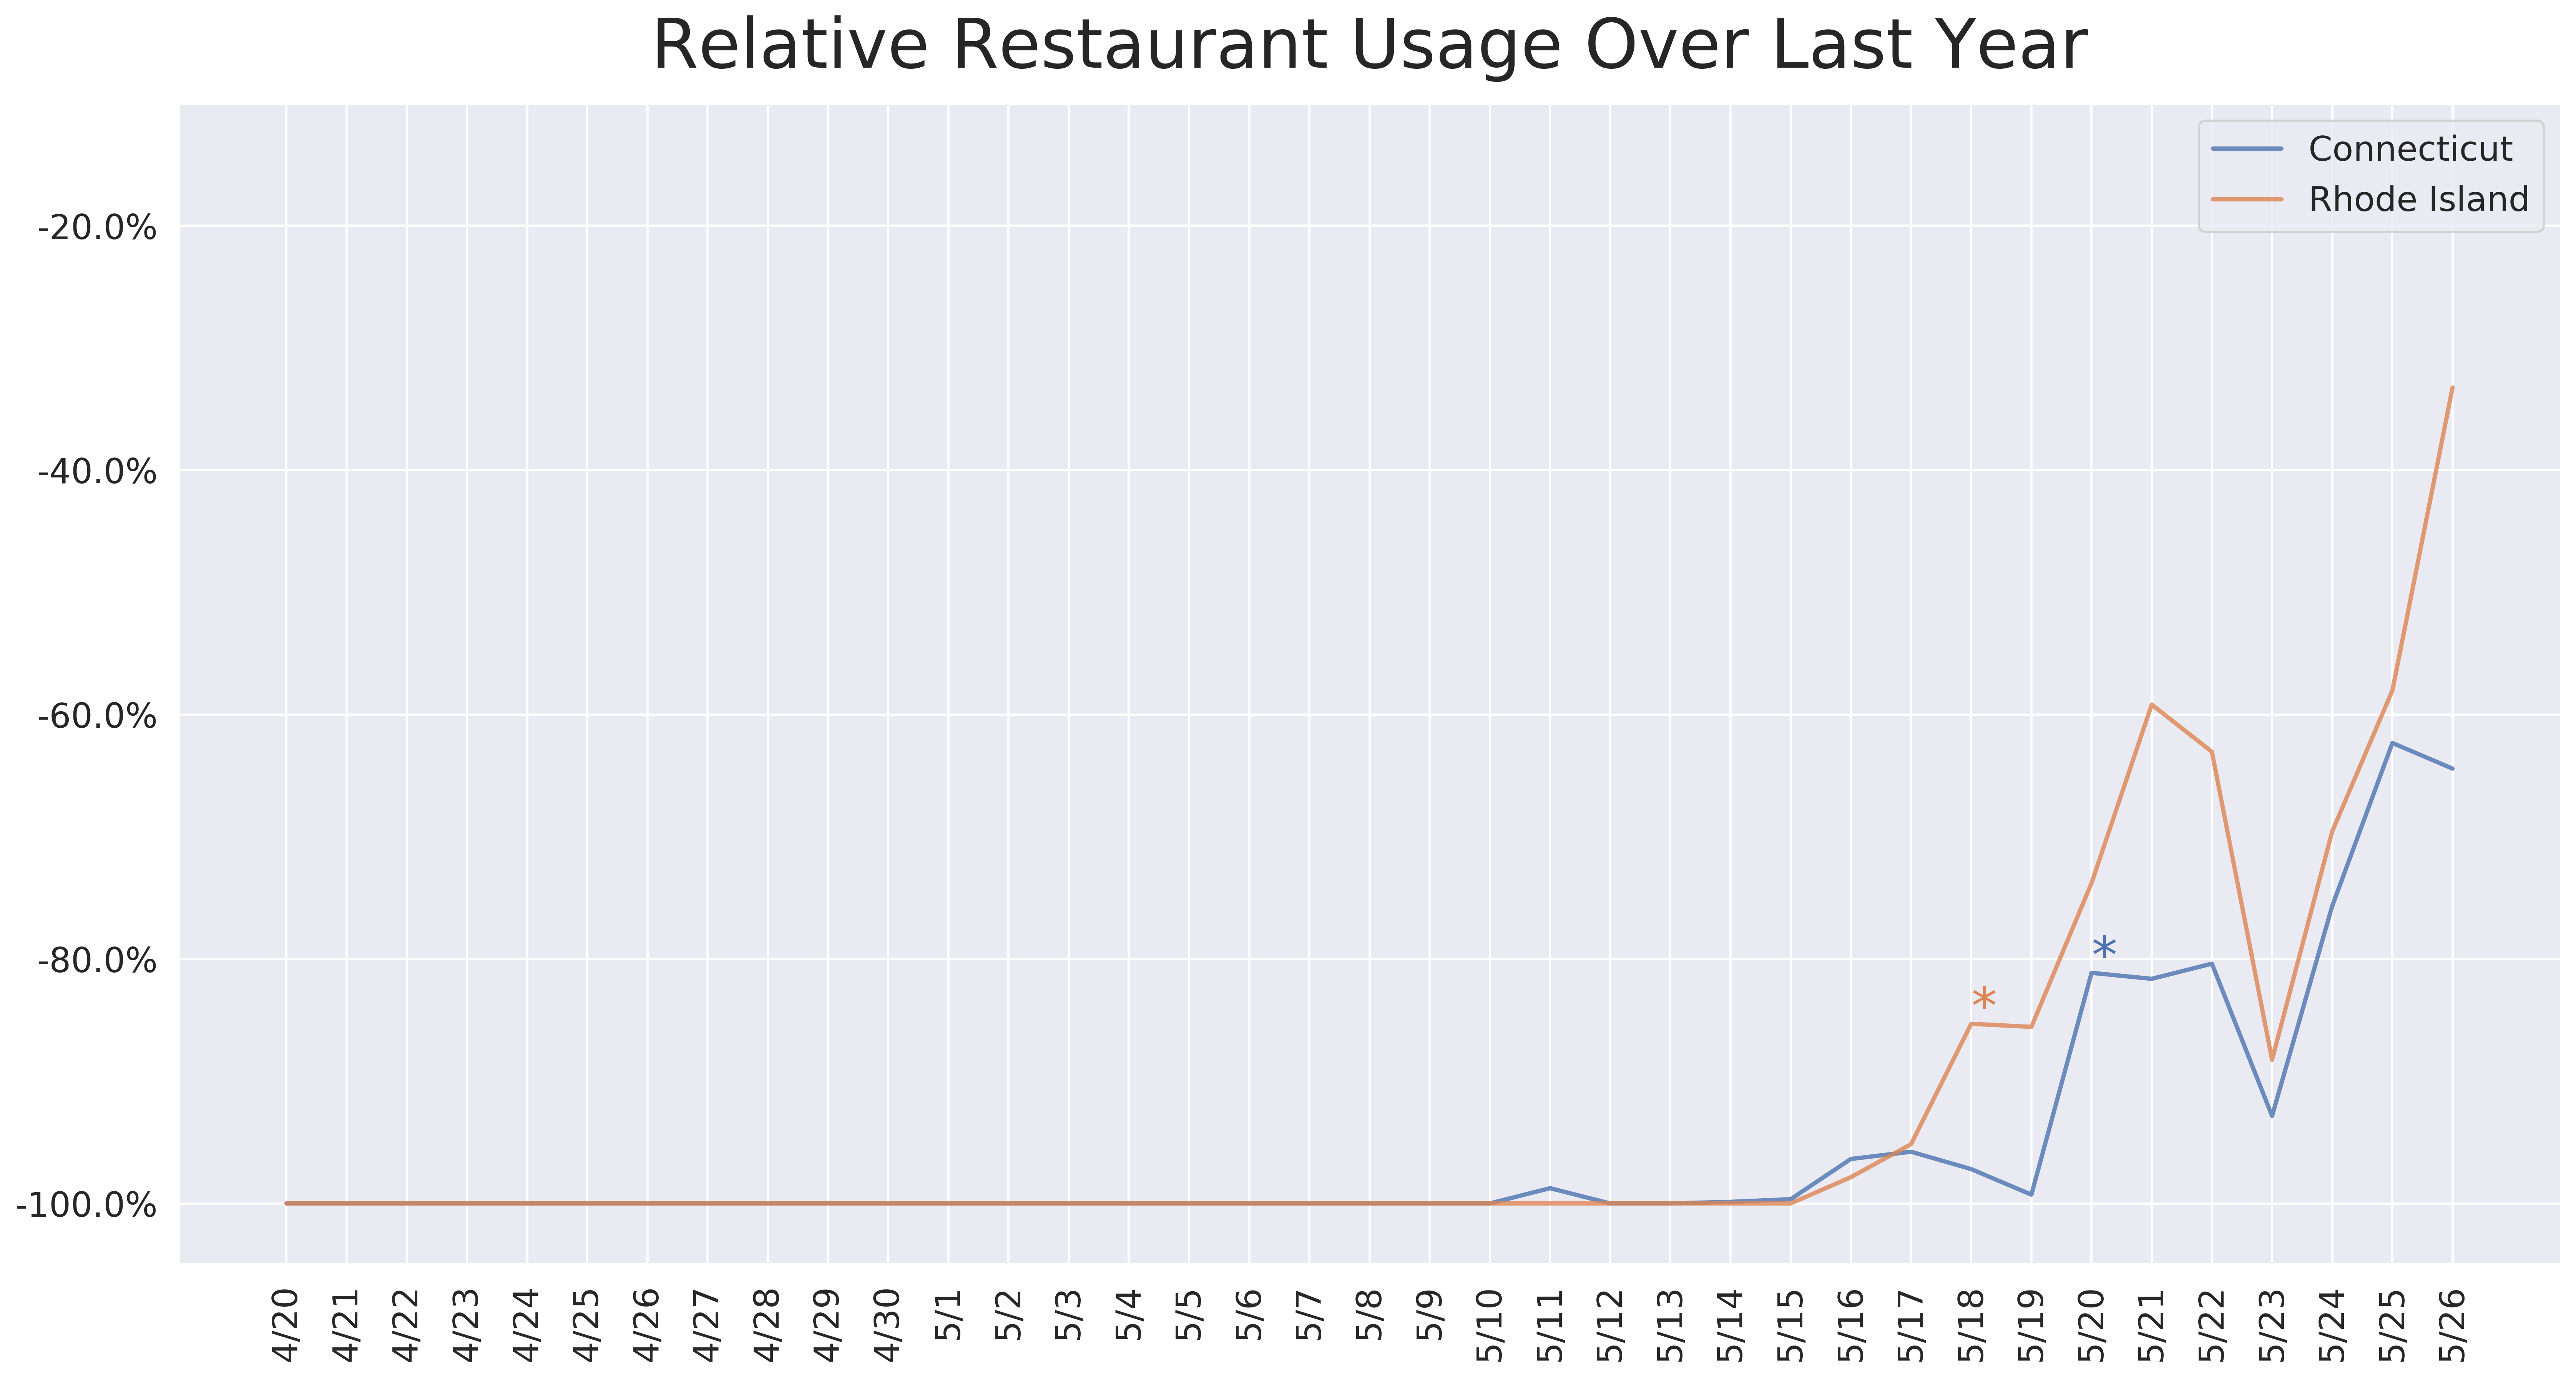

In [7]:
def plot_combined(df, states, dates):
    
    plt.figure(figsize=(20, 10), dpi=400)
    
    for state in states:
        
        # Isolate state
        condition = (df['Name'] == state) & (df['Type'] == 'state')
        index_values = df.loc[condition, dates].values.flatten()
        
        # Plot
        line_plot = plt.plot(dates, index_values, label=state, alpha=0.8, linewidth=2.0)
        line_color = line_plot[0].get_color()
        
        # Annotation
        open_date = state_calendar.loc[state_calendar['State'] == state, 'Date'].values[0]
        date_index_value = df.loc[condition, open_date].values[0]
        plt.text(open_date, date_index_value, "*", color=line_color, fontsize=24)
        plt.ylim(-105, -10)

    # Formatting
    plt.xticks(fontsize=16, rotation=90)
    plt.gca().set_yticklabels(['{}%'.format(x) for x in plt.gca().get_yticks()])
    plt.yticks(fontsize=16)
    plt.title('Relative Restaurant Usage Over Last Year', fontsize=32, y=1.02)
    plt.legend(fontsize=16)
    plt.show()


# plot_combined(data, opened_states, dates)
plot_combined(data, the_south, dates)
plot_combined(data, the_southwest, dates)
plot_combined(data, the_midwest, dates)
plot_combined(data, the_northeast, dates)